In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.formula.api import Logit
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib

In [23]:
seattle_data = pd.read_csv("Node_Based_Seattle.csv")
seattle_data['constant'] = np.ones(len(seattle_data))

In [34]:
%matplotlib notebook

In [124]:
seattle_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       '#CRASHES', '0Ingoing', '0OneWay', '0Outgoing', '1CR', '1Ingoing',
       '1OneWay', '1Outgoing', '2CR', '2Ingoing', '2OneWay', '2Outgoing',
       '3CR', '3Ingoing', '3OneWay', '3Outgoing', '4CR', '4Ingoing', '4OneWay',
       '4Outgoing', '5CR', '5Ingoing', '5OneWay', '5Outgoing', '6CR',
       '6Ingoing', '6OneWay', '6Outgoing', '7CR', 'LATITUDE', 'LONGITUDE',
       'NODE', 'access', 'access_UNKNOWN', 'access_customers',
       'access_delivery', 'access_destination', 'access_no', 'access_official',
       'access_permissive', 'access_private', 'access_yes', 'crossing',
       'crossing_UNKNOWN', 'crossing_controlled', 'crossing_island',
       'crossing_no', 'crossing_traffic_signals',
       'crossing_traffic_signals;marked', 'crossing_uncontrolled',
       'crossing_uncontrolled;zebra', 'crossing_unmarked', 'crossing_yes',
       'crossing_zebra', 'highway', 'highway_UNKNOWN', 'highway_bus_stop',
 

In [20]:
features = ['1Ingoing', '1OneWay', '1Outgoing', '2CR', '2Ingoing', '2OneWay',
       '2Outgoing', '3CR', '3Ingoing', '3OneWay', '3Outgoing', '4CR',
       '4Ingoing', '4OneWay', '4Outgoing', '5CR', '5Ingoing', '5OneWay',
       '5Outgoing', '6CR', '6Ingoing', '6OneWay', '6Outgoing', '7CR',
       'crossing_no', 'crossing_traffic_signals', 'highway_crossing', 'highway_stop',
       'highway_traffic_signals','stop_all', 'traffic_signals_ramp_meter',
       'traffic_signals_signal', 'constant']

In [21]:
seattle_data.fillna(0, inplace=True)
Y = seattle_data['#CRASHES']
# print(Y)
k = seattle_data[features]
seattle_data.fillna(0, inplace = True)
X = seattle_data[features]
# X = add_constant(X)
# results = Logit(Y, X).fit()
results = OLS(Y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               #CRASHES   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     894.9
Date:                Thu, 13 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:57:09   Log-Likelihood:            -5.4757e+05
No. Observations:              173228   AIC:                         1.095e+06
Df Residuals:                  173196   BIC:                         1.096e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
1Ingoing            

In [188]:
reg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.33)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


fit = reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)
print("Mean Squared Error:", fit.score(X_test, y_test))
print("Cross Validation: ", KFold(n_splits=7))
print("Cross Validation2?: ", np.mean(cross_val_score(fit,X,Y,cv=7, scoring='neg_mean_squared_error')))


116062
57166
116062
57166
Mean Squared Error: 0.141321541316
Cross Validation:  KFold(n_splits=7, random_state=None, shuffle=False)
Cross Validation2?:  -41.4582086522


86614.0
-122.2834049


C:\Users\Randon\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>


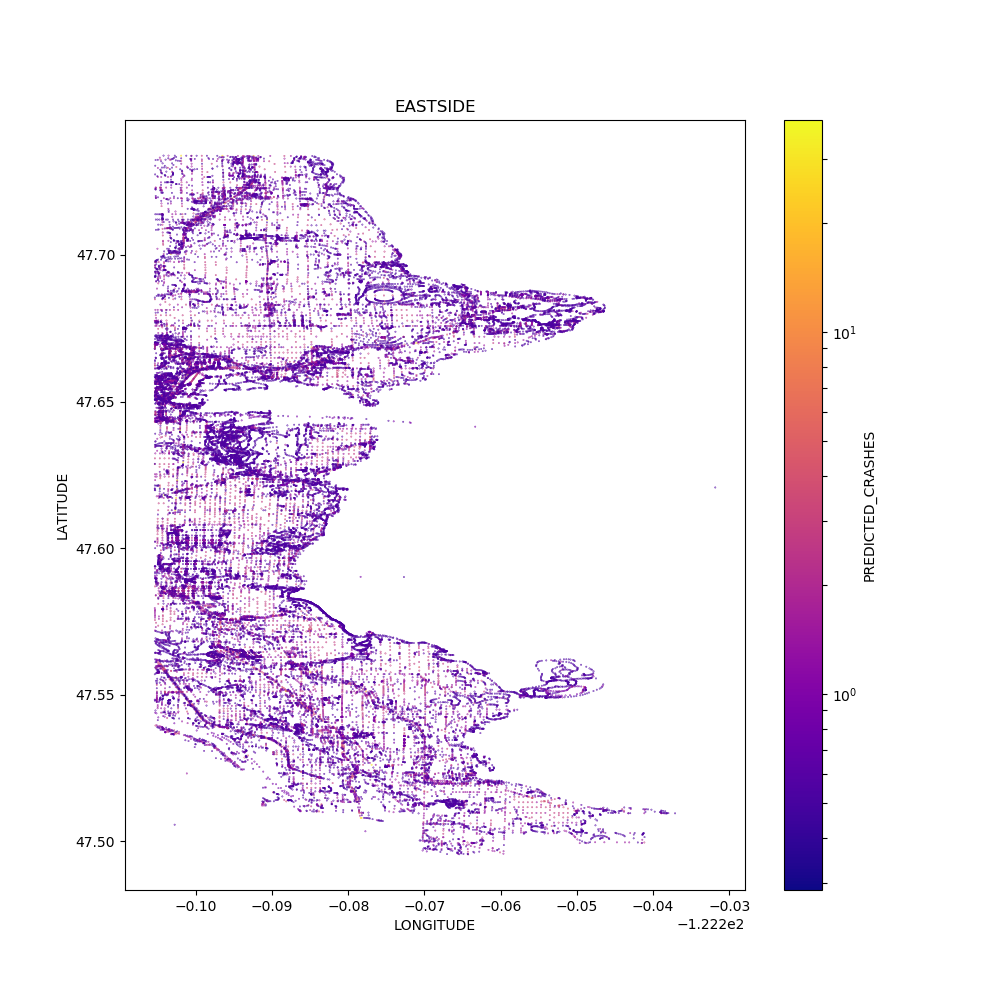

In [47]:
srty = seattle_data.sort_values(by=["LONGITUDE"])
print(len(srty)/2)
print(seattle_data.at[86614, "LONGITUDE"])
west = seattle_data[seattle_data["LONGITUDE"] < -122.3054049]
east = seattle_data[seattle_data["LONGITUDE"] >= -122.3054049]
test_fit = reg.fit(west[features], west["#CRASHES"])
p_crashes = reg.predict(east[features])
east["PREDICTED_CRASHES"] = p_crashes
eplot = east.plot(kind='scatter', x="LONGITUDE", y='LATITUDE', c="PREDICTED_CRASHES", s=.1, figsize=(10,10), cmap='plasma',norm=matplotlib.colors.LogNorm(), title="EASTSIDE")
ylims = eplot.get_ylim()
xlims = eplot.get_xlim()

<IPython.core.display.Javascript object>


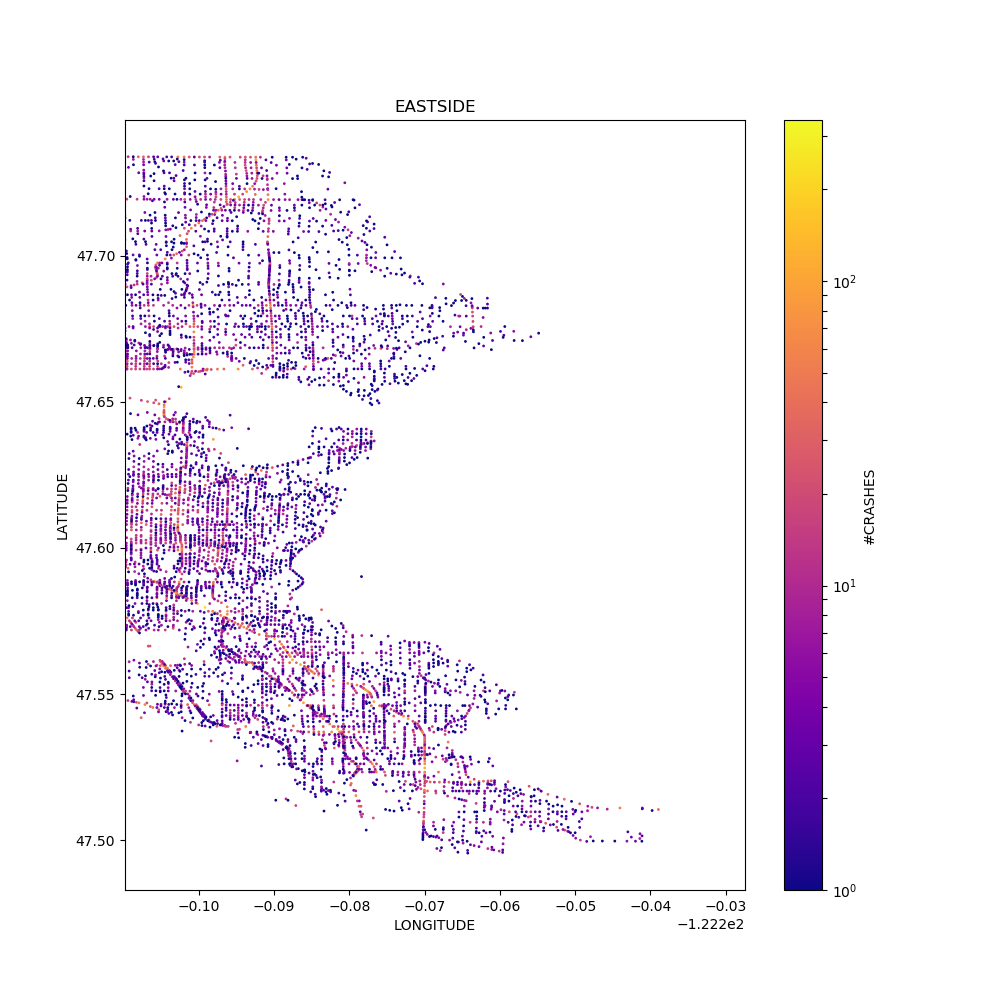

In [46]:

seattle_data.plot(kind='scatter', x="LONGITUDE", y='LATITUDE', c="#CRASHES", s=1, xlim=xlims, ylim=ylims,figsize=(10,10), cmap='plasma',norm=matplotlib.colors.LogNorm(), title="EASTSIDE")

